<a href="https://colab.research.google.com/github/venujala/700766038/blob/main/icp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
235/235 [==============================] - 20s 65ms/step - loss: 0.6941 - accuracy: 9.3333e-04 - val_loss: 0.6940 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.6939 - accuracy: 9.5000e-04 - val_loss: 0.6938 - val_accuracy: 0.0011
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.6938 - accuracy: 9.3333e-04 - val_loss: 0.6937 - val_accuracy: 0.0011
Epoch 4/10
235/235 [==============================] - 7s 29ms/step - loss: 0.6936 - accuracy: 9.8333e-04 - val_loss: 0.6935 - val_accuracy: 0.0011
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6934 - accuracy: 9.8333e-04 - val_loss: 0.6934 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6933 - accuracy: 0.0010 - val_loss: 0.6932 - val_accuracy: 0.0011
Epoch 7/10
235/235 [==============================] - 6s 2

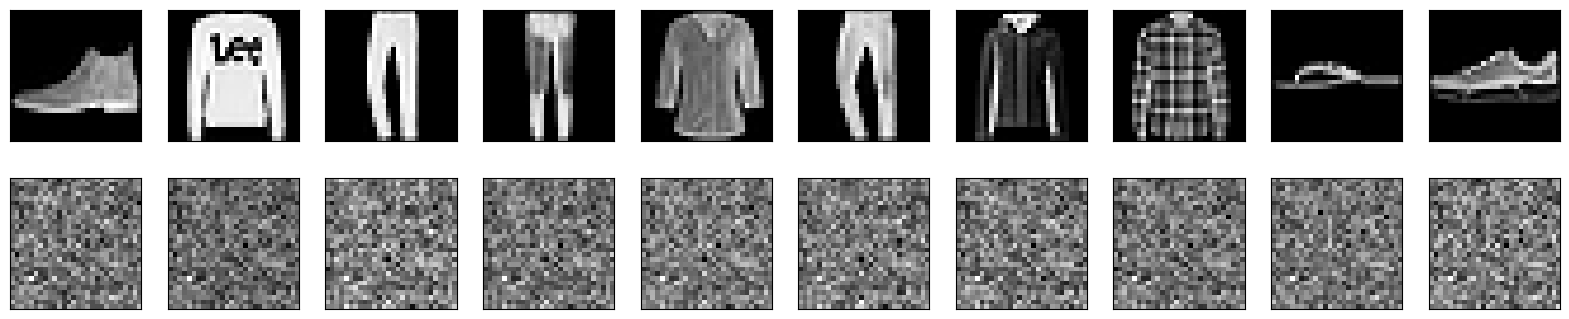

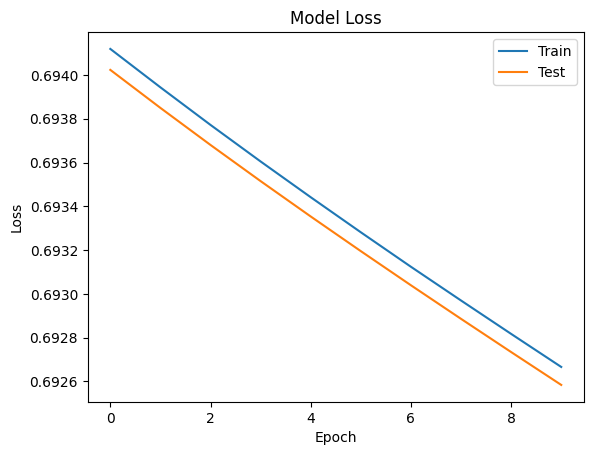

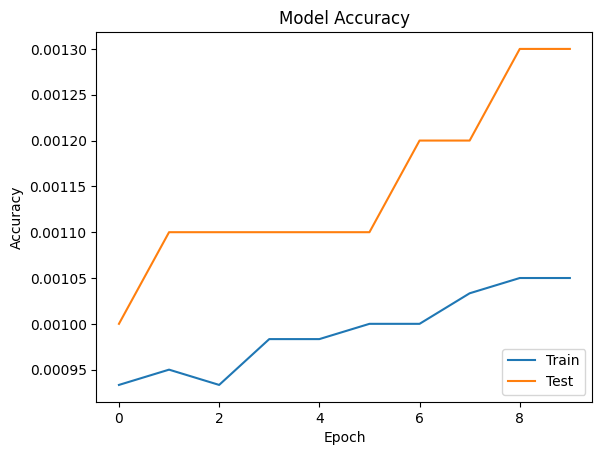

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32              # Define the encoder dimension
input_img = Input(shape=(784,))        # Define the input placeholder
hidden_1 = Dense(256, activation='relu')(input_img)   # Define the first hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(128, activation='relu')(input_img)   # Define the second hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_2)
hidden_3 = Dense(256, activation='relu')(encoded)   # Define the first hidden layer of the decoder
decoded = Dense(784, activation='sigmoid')(hidden_3)   # Define the output layer
autoencoder = Model(input_img, decoded)     # Define the autoencoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy']) # Compiling the model
(x_train, _), (x_test, _) = fashion_mnist.load_data() # Loading the fashion MNIST dataset
x_train = x_train.astype('float32') / 255.   # Normalize the data and flatten the images
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = autoencoder.fit(x_train, x_train,  # Training the autoencoder
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
decoded_imgs = autoencoder.predict(x_test)  # Make predictions on the test data
# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Displaying original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot the loss and accuracy over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()